# EPC02 
### Nome: Adriel Bombonato Guidini Godinho
### RA: 191011631

## ADALINE (Regra Delta)

---

In [72]:
import numpy as np

class Adaline:
    
    def __init__(self, input):
        self.input = input
        self.weights = np.random.rand(self.input.shape[1], )
        
    def activation_function(self, linear_combination):
        """Tomando z = Wx + b, faz a função de ativação bipolar de z"""
        return np.where(linear_combination >= 0, 1, -1)
    
    def predict(self, input_data):
        linear_combination = np.dot(input_data, self.weights)
        return self.activation_function(linear_combination)
        
    def train(self, input_data, labels, error_threshold, learning_rate, max_epoch):
        eqm_atual = 0
        eqm_ant = 1
        epoch = 0
        errors_quadr = []
        eqm_atual_list = []
        while abs(eqm_atual - eqm_ant) > error_threshold and epoch <= max_epoch:
            epoch+=1
            eqm_ant = eqm_atual
            soma_erro = 0
            for single_input, label in zip(input_data, labels):
                output = np.dot(single_input, self.weights)
                error = label - output
                self.weights += learning_rate * error * single_input
                errors_quadr.append(error**2)
                soma_erro += error**2
            eqm_atual = soma_erro/input_data.shape[0]
            eqm_atual_list.append(abs(eqm_atual-eqm_ant))
        return epoch, errors_quadr, eqm_atual_list


In [73]:
# EPC02
training_inputs = np.array([[-1, 0, 1, 1],
                            [-1, 1, 1, 1],
                            [-1, 0, 1, 0],
                            [-1, 1, 1, 0],
                            [-1, 1, 0, 1],
                            [-1, 1, 0, 0],
                            [-1, 0, 0, 1],
                            [-1, 0, 0, 0]])
labels = np.array([-1, -1, 1, 1, -1, 1, -1, 1])
neta = 0.1
epsilon = 0.00001

adaline = Adaline(input=training_inputs)

epoch, errors_quadr, eqm_atual_list = adaline.train(input_data=training_inputs, labels = labels, error_threshold=epsilon, 
                              learning_rate=neta, max_epoch=100)

print(f'Erro quadrático individual: {errors_quadr}\n')
print(f'Número total de épocas: {epoch}\n')
print(f'Lista de todas as eqm_atual: {eqm_atual_list}\n')

Erro quadrático individual: [0.4546180166500264, 0.5664912805547082, 2.623565500941305, 1.1889306616661068, 0.29526720364824993, 2.048376905329376, 0.06936819087715981, 2.4791890403934302, 0.860123913381665, 1.10761762726932, 1.5719911477435846, 0.4970840797029341, 0.287899533311663, 1.3409880081342274, 0.03117214070113022, 1.8898098583676632, 0.6987019317786748, 1.0317650699174672, 1.1033257910073493, 0.2613773183638704, 0.1977938633963408, 0.9506098256730092, 0.005343980633468064, 1.4896644099410143, 0.5022592248745644, 0.8636092855411102, 0.806223126715534, 0.14291117683633756, 0.12860312335235458, 0.6860959113712296, 6.998909689628067e-05, 1.1812806685952932, 0.35278293081112605, 0.7069874116372797, 0.5978002470312466, 0.07704298574202634, 0.08343014399468776, 0.4979028530045559, 0.004501649823313341, 0.9374057303367269, 0.24671256105819336, 0.5747154778240594, 0.4472671208573041, 0.04017038691186558, 0.054637102549906856, 0.3624580386617423, 0.011543388272091401, 0.743670101487262

In [75]:
# Teste para os dados com ruídos
ruido = np.random.randn()

inputs = np.array([[0, 1, 1],
                    [1, 1, 1],
                    [0, 1, 0],
                    [1, 1, 0],
                    [1, 0, 1],
                    [1, 0, 0],
                    [0, 0, 1],
                    [0, 0, 0]])


input_ruido = inputs + (ruido/5)

input_ruido = np.insert(input_ruido, 0, -1, 1)

adaline.predict(input_ruido)

# Expected label: [-1, -1, 1, 1, -1, 1, -1, 1]

array([-1, -1,  1,  1, -1,  1, -1,  1])

In [89]:
# 1) e 2)

def classe(prediction):
    return "Classe B" if prediction==-1 else "Classe A"

inputs = np.array([[0, 1, 1],
                    [1, 1, 1],
                    [0, 1, 0],
                    [1, 1, 0],
                    [1, 0, 1],
                    [1, 0, 0],
                    [0, 0, 1],
                    [0, 0, 0]])

inputs2 = np.copy(inputs)

input_ruido1 = inputs + (np.random.rand()/5)
input_ruido2 = inputs + (np.random.rand()/5)

input_ruido1 = np.insert(input_ruido1, 0, -1, 1)
input_ruido2 = np.insert(input_ruido2, 0, -1, 1)

print("             Sinal          Sinal com ruído             Saída    Categoria\n")

for i in range(8):
    print(f'Sinal {i+1} ==> {inputs[i][1:]} | {input_ruido1[i][1:]} | {adaline.predict(input_ruido1)[i]} | {classe(adaline.predict(input_ruido1)[i])}')
    print(f'Sinal {i+1} ==> {inputs[i][1:]} | {input_ruido2[i][1:]} | {adaline.predict(input_ruido2)[i]} | {classe(adaline.predict(input_ruido2)[i])}')

             Sinal          Sinal com ruído             Saída    Categoria

Sinal 1 ==> [1 1] | [0.03582745 1.03582745 1.03582745] | -1 | Classe B
Sinal 1 ==> [1 1] | [0.12405153 1.12405153 1.12405153] | -1 | Classe B
Sinal 2 ==> [1 1] | [1.03582745 1.03582745 1.03582745] | -1 | Classe B
Sinal 2 ==> [1 1] | [1.12405153 1.12405153 1.12405153] | -1 | Classe B
Sinal 3 ==> [1 0] | [0.03582745 1.03582745 0.03582745] | 1 | Classe A
Sinal 3 ==> [1 0] | [0.12405153 1.12405153 0.12405153] | 1 | Classe A
Sinal 4 ==> [1 0] | [1.03582745 1.03582745 0.03582745] | 1 | Classe A
Sinal 4 ==> [1 0] | [1.12405153 1.12405153 0.12405153] | 1 | Classe A
Sinal 5 ==> [0 1] | [1.03582745 0.03582745 1.03582745] | -1 | Classe B
Sinal 5 ==> [0 1] | [1.12405153 0.12405153 1.12405153] | -1 | Classe B
Sinal 6 ==> [0 0] | [1.03582745 0.03582745 0.03582745] | 1 | Classe A
Sinal 6 ==> [0 0] | [1.12405153 0.12405153 0.12405153] | 1 | Classe A
Sinal 7 ==> [0 1] | [0.03582745 0.03582745 1.03582745] | -1 | Classe B
Sinal 7

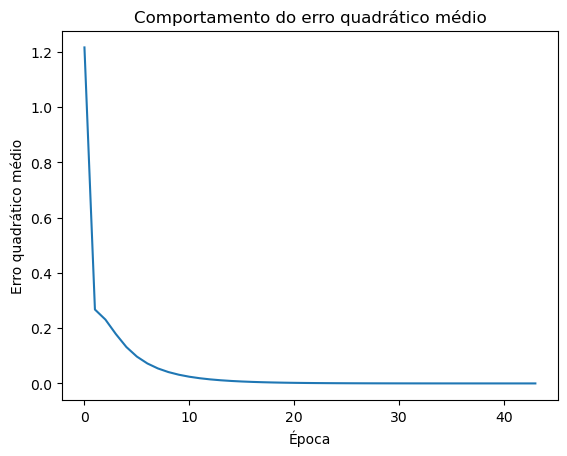

In [77]:
# 3)

import matplotlib.pyplot as plt

x = [i for i in range(epoch)]
y = eqm_atual_list

plt.figure()
plt.xlabel("Época")
plt.ylabel("Erro quadrático médio")
plt.title("Comportamento do erro quadrático médio")
plt.plot(x, y)
plt.show()